## What are Neural Networks ?
-  Act as "Black box" or "Brain" to predict
-  Better than traditional?  - it learns complex non-linear mappings to produce far more accurate output
- Used Image recognition
- Input layer -> Hidden Layer -> Output Layer  - A deep nural networks
-  Will try CNNs, RNNs and LSTMs
    - Feed Foward NN 
    - Convolutional NN - (CNN) -> Don't  scale images 
        input = tree, each pixel coord is a value RBG (3 co-variables) such as 64X64 represents 64X64X3 which is 12,288.
        CNN use a  3D Valume Arrangement for its Neurons height, width, depth(RGB) for a pixel put it in (Convolution (2 or more function to output one function) + ReLU)
    - Recurrent NN (RNN) -> Feed Foward NN hae no concept of time, each classificaiton i sdone only on the current input.
        current mean (previous + now) therefore same input can produce different output depending on history which means history is short, then have difficult to produce output or ouput seleciton is much larger, confused which one to be correct. _> Vanishing gradient / Exploding Gradient
    - Long Short Term Memory Networks (LSTM)
    To solve RNN -> Trying to solve RNN, introducing a memory unit (cell), long-term dependencies, remembering info as time goes
        
        
### BINGO!!! - agreegated together because of certain similarities - definitley need to explore here!

## Clustering Algorithms
continue tomorrow - https://amfam.udemy.com/course/the-data-analyst-bootcamp/learn/lecture/17480222#overview
- K-means clustering
    - choose K (centroid) via Silhouette Method or Elbow (Was K = 4)
    - Understand the data domain
    - Set initial centroid and nearest distance, then move centroid repeat that again
    - simple, scales to large data set - guarantees cnvergence
    - easily adapts to new examples and generalize differnt shapes
    - disadvantage - adopt new key adopting new data set and difficulties varing sizes and  density
    - doesn't scale well large dementions (PCA can help)
    - doesn't work well with categoris like fruit (too many categories below it (elbow method can help).
    
    - What is then silhouette method?
        - A method of validating the consistency withing cllsters of data
        - The thechniuqe provides a succinct graphical rep how each object has been classified
        - Shilhouette coefficient is close to +1 inidcates the point is far (good??? because there is distinction between clusters), close to 0 indicates point is near(bad?? no distinction between clusters) S(i) coefficient = (b(i)-a(i) / max(b(i), a(i) - define mean(a(i)) and closest cluster (b(i)) 
        - Higher coefficient value indicates clear distiction between categories.
        
- Agglomerative Hierachical Clustering
- Mean-Shift Clustering
- DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- Expectation-Maximization(EM) -> Using Gaussian Mixture Models(GMM)

In [23]:
# Import basic necessities
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [24]:
drivers_df = pd.read_csv("ready_db/drviers.csv")
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,1,2.0,824,27.0,7420963
1,2,1.0,824,28.0,7420963
2,3,2.0,666,51.0,7396448
3,4,2.0,666,34.0,6208988
4,5,2.0,824,88.0,6078430


In [25]:
#drop only index colum which is Driver id
drivers_df = drivers_df.dropna()
drivers_df = drivers_df.drop(columns='DRIVER_ID')
drivers_df.head()

,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,2.0,824,27.0,7420963
1,1.0,824,28.0,7420963
2,2.0,666,51.0,7396448
3,2.0,666,34.0,6208988
4,2.0,824,88.0,6078430


In [51]:
# Remove creadit score outcome target from fetures data
y = drivers_df['CREDIT_SCORE']
X = drivers_df.drop(columns='CREDIT_SCORE')

from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, init="random", n_init =10, max_iter = 500, tol= 1e-04, random_state=0)
km_predict = km.fit_predict(X)
km_predict

array([3, 3, 3, 1, 1, 2, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 1, 2, 1, 2, 1, 3, 3, 3, 1, 2, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 2, 3, 3, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 1, 3, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 2, 3, 3, 1, 1, 3, 3, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 3, 2, 3, 2, 1, 3, 1, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 3, 3, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,

In [52]:
len(km_predict[km_predict == 1])

179

# plot the 7 cluster
import matplotlib.pyplot as plt
plt.scatter(X[km_predict == 0, 0], X[km_predict == 0,1], c='lightgreen', marker ='s', edgecolor='black', label='cluster 1')
plt.scatter(X[km_predict == 1, 0], X[km_predict == 1,1], c='orange', marker ='o', edgecolor='black', label='cluster 2')
plt.scatter(X[km_predict == 2, 0], X[km_predict == 2,1], c='lightblue', marker ='v', edgecolor='black', label='cluster 2')


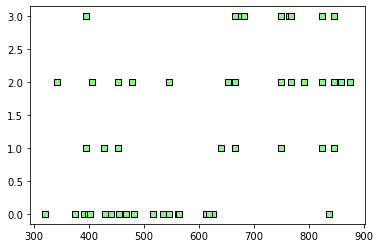

In [53]:
import matplotlib.pyplot as plt
plt.scatter(y, km_predict, c='lightgreen', marker ='s', edgecolor='black', label='cluster 1')

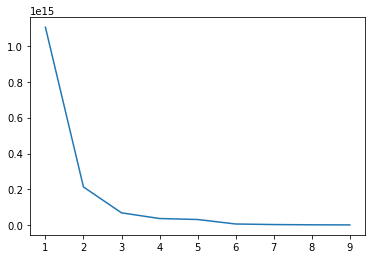

In [55]:
sum_distances = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
    km = km.fit(X)
    sum_distances.append(km.inertia_)
    
plt.plot(K, sum_distances)

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters =[2,3, 4, 5, 6, 7]
for n_cluster in range_n_clusters :
    cluster = KMeans(n_clusters=n_cluster, random_state=10)
    cluter_predict = cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluter_predict)
    print(f"for n_clusters = {n_cluster} and The ave score is:{silhouette_avg}")

for n_clusters = 2 and The ave score is:0.9094474278231529
for n_clusters = 3 and The ave score is:0.6508765393262812
for n_clusters = 4 and The ave score is:0.7003612418948909
for n_clusters = 5 and The ave score is:0.6995151847540528
for n_clusters = 6 and The ave score is:0.7182419735151025
for n_clusters = 7 and The ave score is:0.712354572388523


# Adding PCA Principal Component Analysis
- Always normalize your dataset before PCA - some loss when reduce dimensionality and sensitive to scaling
- PC are always linearly independent - no correlation ? less dimensions
- Orthogonal/perendicular to every other pC
- PCA use k-dimensiions to represnet some value
- Numerically we compute PCA using SVD(singular Value Decomposition)
- New Data K*N = [top k eigenvector] k*m [Original dataset]m*n

# alternatively we can use T-Distributed Stochastic Neighbor Embedding (t-SNE)
- popular Dimensionality Reduction - 2008 proven more effectived than PCA
- solves PCA's linear independent
- solves curse of dimentionality (crowdness)
- uses stochastic neighbors ---- BINGO
- no clear line between poins as solved
- However, lack of boundary is created
- LOCAL is important than GLOBAL, but not ignored which allows well-balanced dimensionality created.

In [63]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection

In [64]:
# Sample found in https://www.digitalvidya.com/blog/tsne-python/
n_samples, n_features = X.shape
n_neighbors = 30

In [65]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
  x_min = np.min(X, 0)
  x_max = np.max(X, 0)
  X = (X - x_min) / (x_max - x_min)     
  plt.figure()
  ax = plt.subplot(111)
  for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1],
             str(digits.target[i]),
             color=plt.cm.Set1(y[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
      ## only print thumbnails with matplotlib > 1.0
      shown_images = np.array([[1., 1.]])  # just something big
      for i in range(digits.data.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
          ## don’t show points that are too close
          continue
          shown_images = np.r_[shown_images, [X[i]]]
          imagebox = offsetbox.AnnotationBbox(
              offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
          ax.add_artist(imagebox)
  plt.xticks([]), plt.yticks([])
  if title is not None:
    plt.title(title)

Computing PCA projection


NameError: name 'digits' is not defined

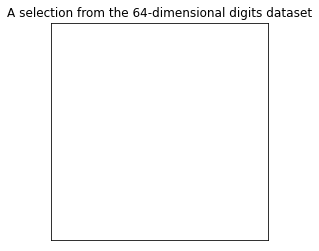

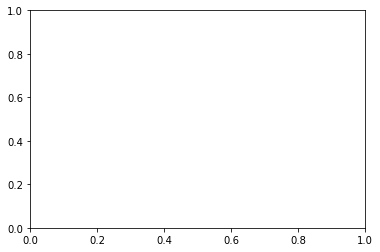

In [69]:
## Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
   ix = 10 * i + 1
   for j in range(n_img_per_row):
       iy = 10 * j + 1
       img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

## Computing PCA
print('Computing PCA projection')
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
              'Principal Components projection of the digits (time %.2fs)' %
              (time() - t0))

## Computing t-SNE
print('Computing t-SNE embedding')
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
          't-SNE embedding of the digits (time %.2fs)' %
          (time() - t0))
plt.show()